# 1. Tarea:Analisis Exploratorio

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
from sklearn import preprocessing
init_notebook_mode(connected=True)

#### Leer Excel Iris.xlsx

In [4]:
df = pd.read_excel('../Data/Iris.xlsx')

In [35]:
df

,Largo de sépalo,Ancho de sépalo,Largo de pétalo,Ancho de pétalo,Especies
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Largo de sépalo  150 non-null    float64
 1   Ancho de sépalo  150 non-null    float64
 2   Largo de pétalo  150 non-null    float64
 3   Ancho de pétalo  150 non-null    float64
 4   Especies         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,Largo de sépalo,Ancho de sépalo,Largo de pétalo,Ancho de pétalo
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3040DFEE0>,
      dtype=object)

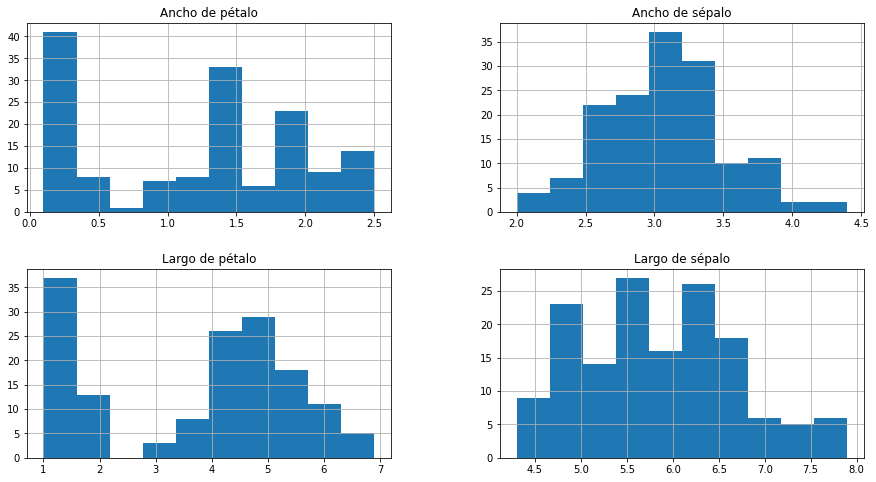

In [18]:
columnas =['Largo de sépalo','Ancho de sépalo','Largo de pétalo','Ancho de pétalo']
df[columnas].hist(figsize=(15, 8))

In [20]:
###### Diagrama de cajas

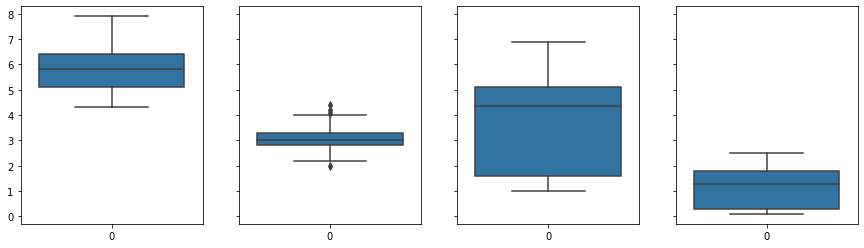

<Figure size 1080x360 with 0 Axes>

In [34]:
_, axes = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
plt.figure(figsize=(15,5))
sns.boxplot(data=df['Largo de sépalo'], ax=axes[0]); # grafico de posicion cero 
sns.boxplot(data=df['Ancho de sépalo'], ax=axes[1]); # grafico de posicion cero 
sns.boxplot(data=df['Largo de pétalo'], ax=axes[2]); # grafico de posicion cero 
sns.boxplot(data=df['Ancho de pétalo'], ax=axes[3]); # grafico de posicion cero 

##sns.boxplot(x='Ancho de pétalo', data=df);

In [37]:
df['Especies'].head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: Especies, dtype: object

In [38]:
df['Especies'].value_counts(normalize=True, dropna=False) #Frecuencia en %

Versicolor    0.333333
Virginica     0.333333
Setosa        0.333333
Name: Especies, dtype: float64

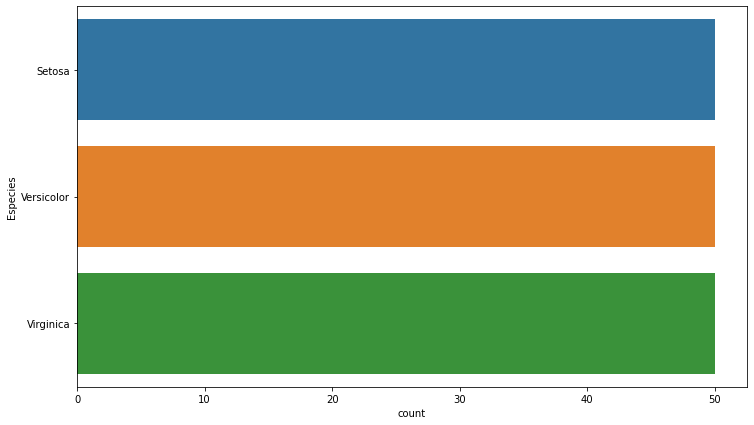

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(y='Especies', data=df)

In [41]:
df['Especies'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: Especies, dtype: int64

In [ ]:
## 3.1 Visualización multivariada

In [43]:
df[columnas].head()

,Largo de sépalo,Ancho de sépalo,Largo de pétalo,Ancho de pétalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
matriz_correlacion = df[columnas].corr()

In [45]:
matriz_correlacion

,Largo de sépalo,Ancho de sépalo,Largo de pétalo,Ancho de pétalo
Largo de sépalo,1.000000,-0.117570,0.871754,0.817941
Ancho de sépalo,-0.117570,1.000000,-0.428440,-0.366126
Largo de pétalo,0.871754,-0.428440,1.000000,0.962865
Ancho de pétalo,0.817941,-0.366126,0.962865,1.000000


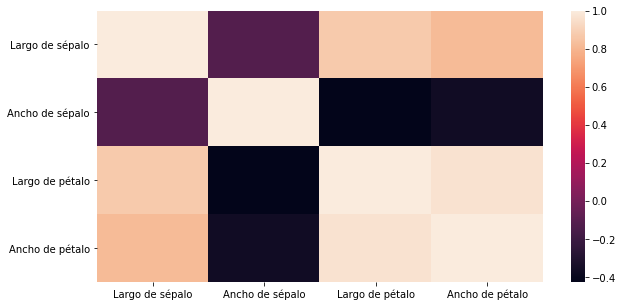

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(matriz_correlacion);

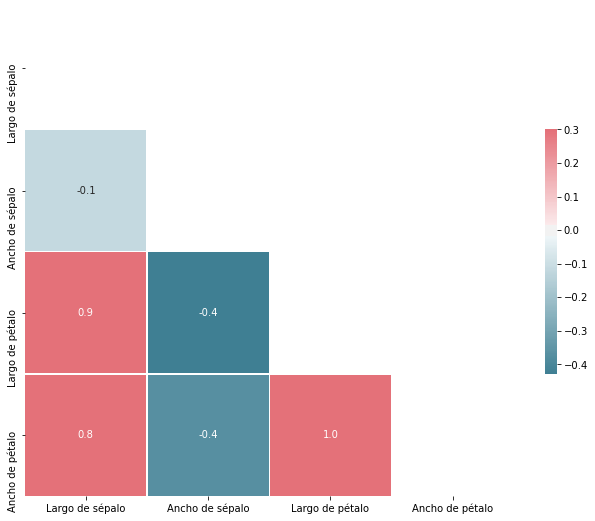

In [47]:
# Generate a mask for the upper triangle
mask = np.zeros_like(matriz_correlacion, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matriz_correlacion, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt='.1f')

In [ ]:
#se oberva bastante correlacion entre los siguientes pares :
#(largo de petalo--largo de sepalo),
#(ancho de petalo --Largo de sepalo)
#(Ancho de petalo --largo de petalo)

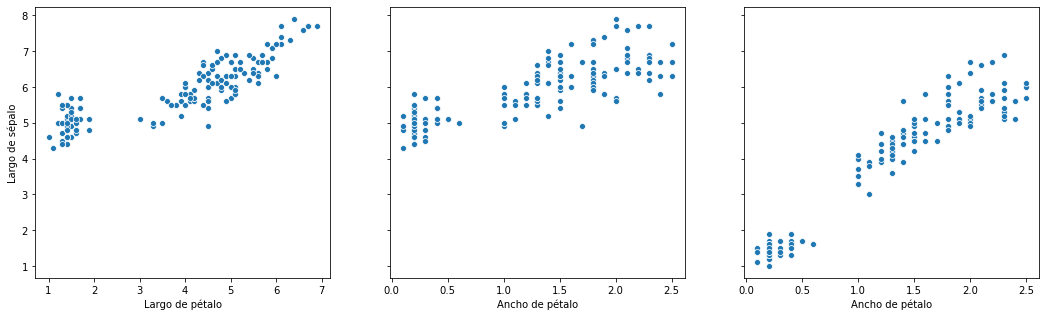

<Figure size 1080x360 with 0 Axes>

In [60]:
#veamos la relacion entre las variables
_, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
plt.figure(figsize=(15,5))
sns.scatterplot(x="Largo de pétalo", y="Largo de sépalo", data=df,ax=axes[0])  
sns.scatterplot(x="Ancho de pétalo", y="Largo de sépalo", data=df,ax=axes[1])  
sns.scatterplot(x="Ancho de pétalo", y="Largo de pétalo", data=df,ax=axes[2])  

In [ ]:
Tratamiento de datos


In [53]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [54]:
missing_values_table(df)

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [55]:
#los datos se encuetran completos así que no es necesaria la imputacion de datos

In [56]:
# 4. Análisis y tratamiento de outliers.En los diagramas de bigotes anteriores se observó que [Ancho de sépalo] presenta outliers

In [61]:
trace0 = go.Box(
    y=df['Ancho de sépalo']
)

data = [trace0]
iplot(data)

In [62]:
df['Ancho de sépalo'].quantile([.25, .5, .75])

0.25    2.8
0.50    3.0
0.75    3.3
Name: Ancho de sépalo, dtype: float64

In [63]:
rango_intercuartil = df['Ancho de sépalo'].quantile(.75)- df['Ancho de sépalo'].quantile(.25)
print('El rango intercuartil es: ', rango_intercuartil)

El rango intercuartil es:  0.5


In [64]:
limite_superior = df['Ancho de sépalo'].quantile(.75) + 1.5*rango_intercuartil # por formula así se calcula
limite_inferior = df['Ancho de sépalo'].quantile(.25) - 1.5*rango_intercuartil
print('Rango superior: ',limite_superior)
print('Rango inferior: ',limite_inferior)

Rango superior:  4.05
Rango inferior:  2.05


In [65]:
df[(df['Ancho de sépalo']>limite_superior)|(df['Ancho de sépalo']<limite_inferior)].shape

(4, 5)

In [66]:
outliers = df[(df['Ancho de sépalo']>limite_superior)|(df['Ancho de sépalo']<limite_inferior)].shape[0]

In [68]:
outliers

4

In [70]:
print(outliers*100/df.shape[0]) #vemos el % de outliers

2.6666666666666665


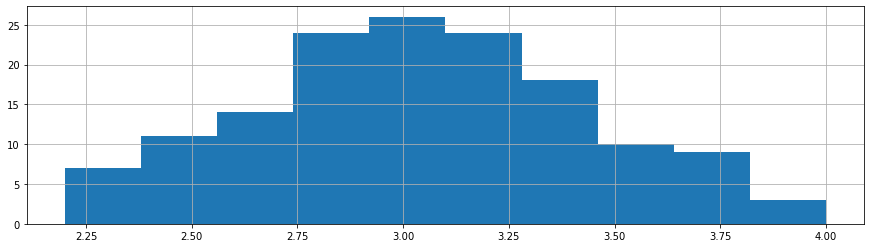

In [71]:
df[(df['Ancho de sépalo']<=limite_superior)&(df['Ancho de sépalo']>=limite_inferior)]['Ancho de sépalo'].hist(figsize=(15, 4))

In [72]:
# se observa como una dist normal

In [ ]:
#imputaremos valores esn este caso con la media 

In [74]:
print('Media:',df['Ancho de sépalo'].mean())


Media: 3.057333333333334


In [79]:
media=df['Ancho de sépalo'].mean()

In [80]:
def reemplazar_por_media(x,limite_superior,limite_inferior,mediana):
    if (x>limite_superior)|(x<limite_inferior):
        return media
    else:
        return x

In [98]:
df['Ancho de sépalo']=df['Ancho de sépalo'].apply(lambda x: reemplazar_por_media(x,limite_superior,limite_inferior,media))


In [87]:
Ancho_de_sepalo= df['Ancho de sépalo'].apply(lambda x: reemplazar_por_media(x,limite_superior,limite_inferior,media))

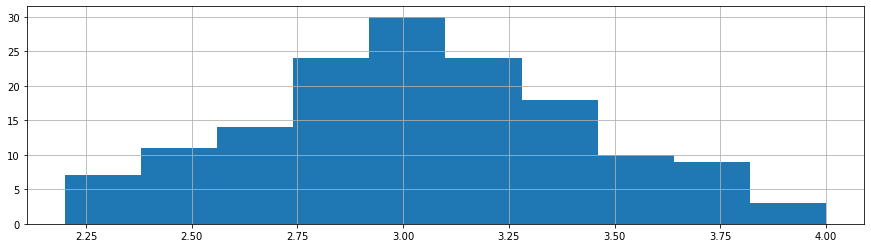

In [88]:
Ancho_de_sepalo.hist(figsize=(15, 4))

In [92]:
trace1 = go.Box(
    y=Ancho_de_sepalo
)

data = [trace1]
iplot(data) 

In [ ]:
### 5.2.1 Creación de dummies

In [93]:
df['Especies'].head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: Especies, dtype: object

In [94]:
pd.get_dummies(df['Especies'],drop_first=False,dummy_na=True)

,Setosa,Versicolor,Virginica,NaN
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
145,0,0,1,0
146,0,0,1,0
147,0,0,1,0
148,0,0,1,0


In [95]:
especies = pd.get_dummies(df['Especies'],drop_first=False)

In [96]:
df[['Especies']].head()

,Especies
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [97]:
especies.head()

,Setosa,Versicolor,Virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [105]:
## 5.3 Feature Scaling ---MIn MAx scaler
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()  #libreria

In [127]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df[['Largo de sépalo','Ancho de sépalo','Largo de pétalo','Ancho de pétalo']])

In [128]:
scaled_df = pd.DataFrame(scaled_df,columns=['Largo de sépalo','Ancho de sépalo','Largo de pétalo','Ancho de pétalo'])

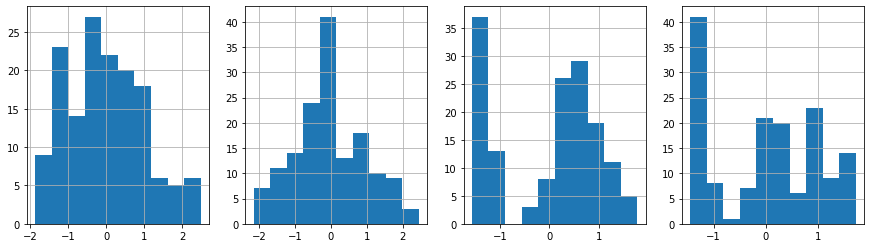

In [130]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

scaled_df['Largo de sépalo'].hist(ax=axes[0])
scaled_df['Ancho de sépalo'].hist(ax=axes[1])
scaled_df['Largo de pétalo'].hist(ax=axes[2])
scaled_df['Ancho de pétalo'].hist(ax=axes[3])

